In [1]:
import matplotlib.ticker as mticker
import seaborn as sns
import pandas as pd
from prody import *
from numpy import *
from matplotlib import * 
from pylab import *
import matplotlib.pyplot as plt
import warnings #hide warnings
warnings.filterwarnings('ignore') #hide warnings
pd.set_option('display.max_rows', None) # mostrar toda a tabela
prody.__version__


/home/pbatista/miniconda3/envs/tutorial/lib/python3.11/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


'2.3.0'

### The folling script will automatically download the pdb files from the 20 most representative SARS-CoV-2 ensemble from clustering analysis

In [2]:
%run -i scripts/build_ensemble.py

⏳ Attempting download for 6VXX...
✔️  Saved as ./structures/6vxx.pdb.gz
⏳ Attempting download for 9CRC...
✔️  Saved as ./structures/9crc.pdb.gz
⏳ Attempting download for 7WHB...
✔️  Saved as ./structures/7whb.pdb.gz
⏳ Attempting download for 7SXU...
✔️  Saved as ./structures/7sxu.pdb.gz
⏳ Attempting download for 7SWX...
✔️  Saved as ./structures/7swx.pdb.gz
⏳ Attempting download for 7TF2...
✔️  Saved as ./structures/7tf2.pdb.gz
⏳ Attempting download for 7KQE...
✔️  Saved as ./structures/7kqe.pdb.gz
⏳ Attempting download for 8V0R...
✔️  Saved as ./structures/8v0r.pdb.gz
⏳ Attempting download for 7YC5...
✔️  Saved as ./structures/7yc5.pdb.gz
⏳ Attempting download for 7KEA...
✔️  Saved as ./structures/7kea.pdb.gz
⏳ Attempting download for 7L2F...
✔️  Saved as ./structures/7l2f.pdb.gz
⏳ Attempting download for 6VYB...
✔️  Saved as ./structures/6vyb.pdb.gz
⏳ Attempting download for 8CY9...
✔️  Saved as ./structures/8cy9.pdb.gz
⏳ Attempting download for 7U0P...
Desired structure doesn't exis

@> WARNING Trying to parse as mmCIF file instead
@> WARNING Could not find _atom_site_anisotrop in lines.
@> WARNING No anisotropic B factors found
@> 32371 atoms and 1 coordinate set(s) were parsed in 0.19s.


✔️  Converted and saved as ./structures/7yeg.pdb.gz


@> WARNING Trying to parse as mmCIF file instead
@> WARNING Could not find _atom_site_anisotrop in lines.
@> WARNING No anisotropic B factors found
@> 51072 atoms and 1 coordinate set(s) were parsed in 0.30s.
@> Local PDB folder is set: '/home/pbatista/ownCloud/tutorial_spike/structures'
@> A plain folder structure will be assumed.
@> PDB file is found in the local folder (/home/pbatista/.../6vxx.pdb.gz).
@> 972 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 21 PDBs were parsed in 0.42s.
@> 21 PDBs were parsed in 0.40s.
@> 21 PDBs were parsed in 0.43s.
@> Retrieving 6vxxD... [  0%]@> WARNING Atomic data could not be parsed, please check the input file.
@> Retrieving 9crcD... [  4%] 1s@> WARNING Atomic data could not be parsed, please check the input file.
@> Retrieving 7sxuD... [ 14%] 1s@> WARNING Atomic data could not be parsed, please check the input file.
@> Retrieving 7swxD... [ 19%] 1s@> WARNING Atomic data could not be parsed, please check the input file.
@> Retrieving 7k

In [3]:
ensemble = loadEnsemble('./ensemble/ensemble.ens.npz')
ensemble

<PDBEnsemble: chain_a + chain_b + chain_c + chain_d + chain_e + chain_f (72 conformations; 972 atoms)>

In [4]:
pca = PCA('ensemble') #iniciar uma instância do PCA
pca.buildCovariance(ensemble, aligned=True) #construir covariância para o ensemble
pca.calcModes() #calcular modos (padrão = 20 modos)

#for a large data set, to speed up the calculations one can use the svd instead of .calcModes
#pca = PCA('ensemble') #iniciar uma instância do PCA
#pca.performSVD(traj)

@> Covariance is calculated using 72 coordinate sets.
@> Covariance matrix calculated in 0.169333s.
@> 20 modes were calculated in 49.62s.


In [5]:
anm = ANM('spike')  
anm.buildHessian(spike)
anm.calcModes()

@> Hessian was built in 0.16s.
@> 20 modes were calculated in 10.41s.


In [6]:
ensemble_sarscov2 = loadEnsemble('./files/ensemble_sarscov2.ens.npz')

In [7]:
ensemble_sarscov2_pc1 = calcProjection(ensemble_sarscov2, pca[0])
ensemble_sarscov2_pc2 = calcProjection(ensemble_sarscov2, pca[1])

In [8]:
ensemble_sarscov2

<PDBEnsemble: close_a + close_b + close_c + close_d + close_e + close_f + close_g + close_h + close_i + close_j + close_k + close_l + close_m + close_n + close_o + close_p + close_q + close_r + close_s + close_t + close_v + close_x + close_y + close_z (2872 conformations; 972 atoms)>

### The folling script will calculate the ligand contacts, PC projections, Radius of gyration, interdomain distances, RBD and NTD CVs(CV1-CV6) and the RDB and NTD areas

### this might take some minutes to run

In [9]:
%run -i ./scripts/analyses.py

@> PDB file is found in the local folder (/home/pbatista/.../6vxx.pdb.gz).
@> 972 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> PDB file is found in the local folder (/home/pbatista/.../7yeg.pdb.gz).
@> 49956 atoms and 1 coordinate set(s) were parsed in 0.17s.
@> PDB file is found in the local folder (/home/pbatista/.../7yeg.pdb.gz).
@> 49956 atoms and 1 coordinate set(s) were parsed in 0.16s.
@> PDB file is found in the local folder (/home/pbatista/.../7yeg.pdb.gz).
@> 49956 atoms and 1 coordinate set(s) were parsed in 0.16s.
@> PDB file is found in the local folder (/home/pbatista/.../7yeg.pdb.gz).
@> 49956 atoms and 1 coordinate set(s) were parsed in 0.16s.
@> PDB file is found in the local folder (/home/pbatista/.../7yeg.pdb.gz).
@> 49956 atoms and 1 coordinate set(s) were parsed in 0.16s.
@> PDB file is found in the local folder (/home/pbatista/.../7yeg.pdb.gz).
@> 49956 atoms and 1 coordinate set(s) were parsed in 0.16s.
@> PDB file is found in the local folder (/home/pb

#### This script will create list and filters to be used to plotings

In [10]:
%run -i ./scripts/lists.py

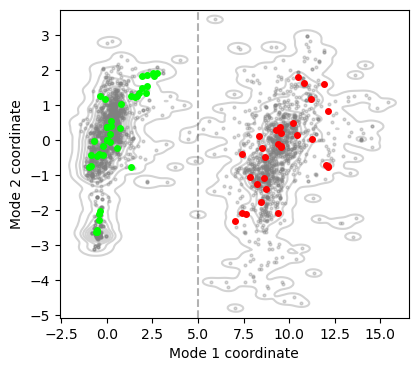

In [11]:
import seaborn as sns
fig = plt.figure(figsize=(4.5,4))
pdbid_closed = list(df_total[df_total.conformation == 'closed']['pdb_label'])
pdbid_open = list(df_total[df_total.conformation == 'open']['pdb_label'])

sns.kdeplot(x=ensemble_sarscov2_pc1, y=ensemble_sarscov2_pc2,thresh = 0.01,bw_adjust=0.3, color='lightgray',zorder=0)
showProjection(ensemble_sarscov2,pca[:2], color = 'grey',markersize=2, alpha=0.3)
showProjection(ensemble[pdbid_closed],pca[:2], color = 'lime',markersize=4)
showProjection(ensemble[pdbid_open],pca[:2], color = 'red',markersize=4)
plt.axvline(5, color='black', linestyle='--', alpha=0.3)
plt.show()

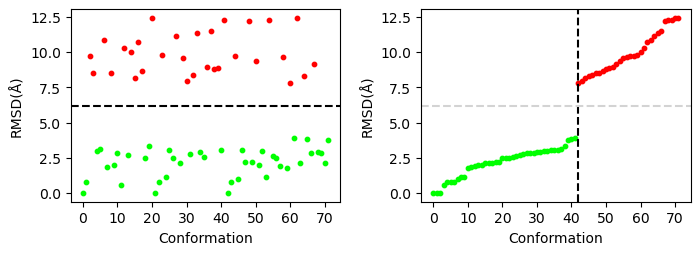

In [12]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8,2.5))
g_pca = GridSpec(ncols=2, nrows=1,width_ratios=[4.5,4.5], wspace = 0.3)

plt.subplot(g_pca[0]);
rmsd = calcRMSD(ensemble)
for i in range(ensemble.numConfs()):
    if rmsd[i] > 6:
        plt.scatter(i,rmsd[i],color='red',s=10)
    else:
        plt.scatter(i,rmsd[i],color='lime',s=10)

plt.axhline(6.2,linestyle='--',color='k')
import matplotlib.ticker as mticker
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(10))
plt.xlabel('Conformation'); #eixo x
plt.ylabel('RMSD(Å)'); #eixo y
plt.title(''); #título

plt.subplot(g_pca[1]);
rmsd_all_ord = sorted(rmsd)

for i in range(ensemble.numConfs()):
    if rmsd_all_ord[i] > 6:
        plt.scatter(i,rmsd_all_ord[i],color='red',s=10)
    else:
        plt.scatter(i,rmsd_all_ord[i],color='lime',s=10)

plt.axvline(42, linestyle='--',color='k')
plt.axhline(6.2,linestyle='--',color='lightgrey')
import matplotlib.ticker as mticker
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(10))
plt.ylabel('RMSD(Å)');
plt.xlabel('Conformation');
plt.title('');


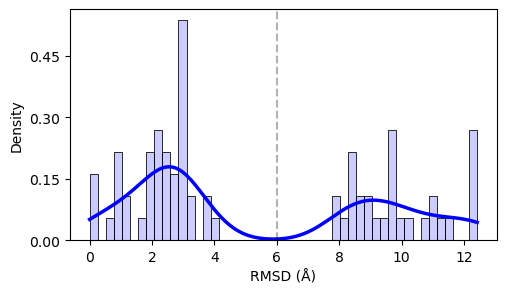

In [13]:
fig = plt.figure(figsize=(5.5,3))
sns.histplot(rmsd, color='blue', kde=True, bins=int(around(max(rmsd) - min(rmsd)))*4, stat = 'density', thresh=0.01, kde_kws={'cut':0,'bw_adjust':0.5},line_kws={'lw':2.5},alpha=0.2)
xlabel('RMSD (Å)')
ylabel('Density')
plt.axvline(6, color='black', linestyle='--', alpha=0.3)
gca().xaxis.set_major_locator(MaxNLocator(integer=True))
gca().xaxis.set_major_locator(MultipleLocator(2))
gca().yaxis.set_major_locator(MultipleLocator(0.15))
show()

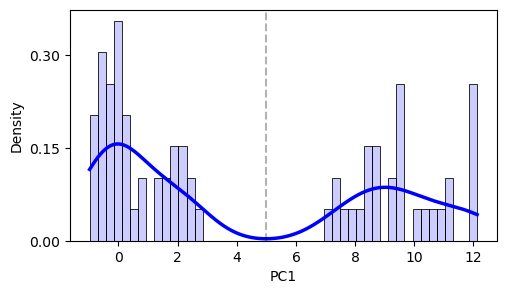

In [14]:
fig = plt.figure(figsize=(5.5,3))
sns.histplot(ensemble_proj_pc1, color='blue', kde=True, bins=int(around(max(rmsd) - min(rmsd)))*4, stat = 'density', thresh=0.01, kde_kws={'cut':0,'bw_adjust':0.5},line_kws={'lw':2.5},alpha=0.2)

xlabel('PC1')
ylabel('Density')
plt.axvline(5, color='black', linestyle='--', alpha=0.3)
gca().xaxis.set_major_locator(MaxNLocator(integer=True))
gca().xaxis.set_major_locator(MultipleLocator(2))
gca().yaxis.set_major_locator(MultipleLocator(0.15))
show()

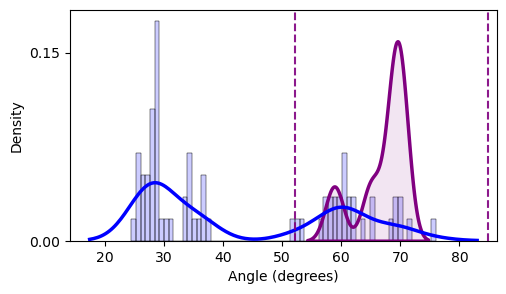

In [15]:
fig = plt.figure(figsize=(5.5,3))
sns.histplot(angle_405_620_991, color="blue", kde=True, bins=int(around(90 - min(angle_405_620_991))), stat = 'density', thresh=0.01, kde_kws={'cut':2,'bw_adjust':0.5},line_kws={'lw':2.5},alpha=0.2)
sns.kdeplot(df_total[df_total.ligand == 'receptor(ACE2)'].angle, color="purple", fill = True,thresh = 0.01,bw_adjust=0.5,alpha=0.1,lw=2.5)


xlabel('Angle (degrees)')
ylabel('Density')
plt.axvline(52.2, color='purple', linestyle='--', alpha=0.9)
plt.axvline(84.8, color='purple', linestyle='--', alpha=0.9)
gca().xaxis.set_major_locator(MaxNLocator(integer=True))
gca().xaxis.set_major_locator(MultipleLocator(10))
gca().yaxis.set_major_locator(MultipleLocator(0.15))
show()

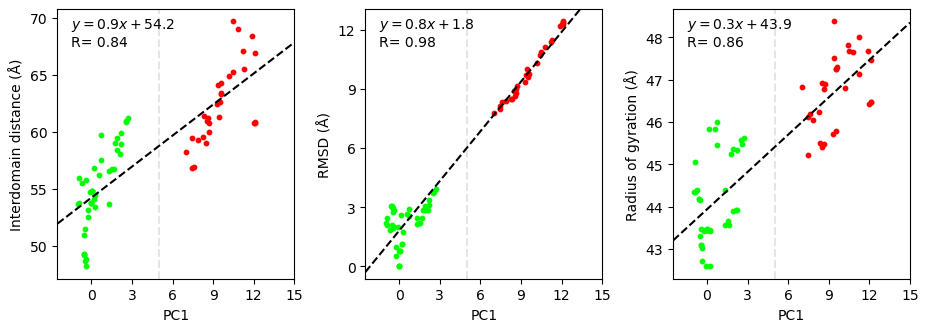

In [16]:
from scipy.stats import linregress
from scipy.stats import pearsonr
fig = plt.figure(figsize=(11,3.5))
g_pca = GridSpec(ncols=3, nrows=1, height_ratios=[4], width_ratios=[4.5,4.5,4.5], wspace = 0.3)

pc1 = ensemble_proj_pc1

subplot(g_pca[0])
for count,val in enumerate(pc1):
    if (val >=5):
        scatter(pc1[count],distance[count], color = 'red',s=10)
    else:
        scatter(pc1[count],distance[count], color = 'lime',s=10)

rval = pearsonr(pc1,distance)
reg = linregress(pc1, distance)       
 
plt.axline(xy1=(0, reg.intercept), slope=reg.slope, linestyle="--", color="k")
       
plt.text(-1.5,(max(distance)-min(distance))*0.9+min(distance),
         f'$y = {reg.slope:.1f}x {reg.intercept:+.1f}$\nR= {rval[0]:.2f}')

plt.axvline(5, color='black', linestyle='--', alpha=0.1)
xlabel('PC1')
ylabel('Interdomain distance (Å)')
title('')
import matplotlib.ticker as mticker
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(3))
xlim(-2.5, 15)
#ylim(45,75)

subplot(g_pca[1])
for count,val in enumerate(pc1):
    if (val >=5):
        scatter(pc1[count],rmsd[count], color = 'red',s=10)
    else:
        scatter(pc1[count],rmsd[count], color = 'lime',s=10)

rval = pearsonr(pc1,rmsd)
reg = linregress(pc1, rmsd)     
 
plt.axline(xy1=(0, reg.intercept), slope=reg.slope, linestyle="--", color="k")
       
plt.text(-1.5, (max(rmsd)-min(rmsd))*0.9+min(rmsd),
         f'$y = {reg.slope:.1f}x {reg.intercept:+.1f}$\nR= {rval[0]:.2f}')  
        


plt.axvline(5, color='black', linestyle='--', alpha=0.1)
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(3))
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(3))
xlabel('PC1')
ylabel('RMSD (Å)')
title('')
xlim(-2.5, 15)
#ylim(45,75)

subplot(g_pca[2])
for count,val in enumerate(pc1):
    if (val >=5):
        scatter(pc1[count],rgyr[count], color = 'red',s=10)
    else:
        scatter(pc1[count],rgyr[count], color = 'lime',s=10)
        
    
rval = pearsonr(pc1,rgyr)
reg = linregress(pc1, rgyr)       
 
plt.axline(xy1=(0, reg.intercept), slope=reg.slope, linestyle="--", color="k")
       
plt.text(-1.5, (max(rgyr)-min(rgyr))*0.9+min(rgyr),
         f'$y = {reg.slope:.1f}x {reg.intercept:+.1f}$\nR= {rval[0]:.2f}')

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(3))
plt.axvline(5, color='black', linestyle='--', alpha=0.1)
xlabel('PC1')
ylabel('Radius of gyration (Å)')
title('')
xlim(-2.5, 15)
show()

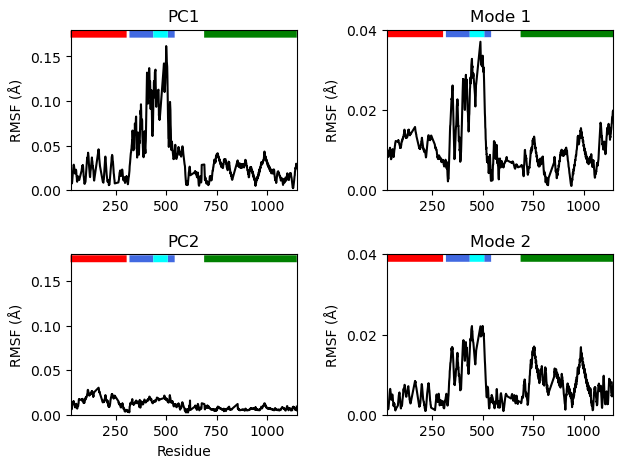

In [17]:
fig = plt.figure(figsize=(7,5))
g_pca = GridSpec(ncols=2, nrows=2, height_ratios=[4,4], width_ratios=[4.5,4.5],wspace=0.4, hspace=0.4)

colors={'NTD':'red','RBD':'royalblue','RBM':'cyan','S2':'green'}

subplot(g_pca[0])
ax= plt.gca()
ax.set_ylim(0,0.175)
plt.plot(resnum,rmsf1_pc,'-',c='k')
showDomainBar(dom.getData('domain'),loc=1,ax=ax,text=False,color=colors)
import matplotlib.ticker as mticker

gca().yaxis.set_major_locator(mticker.MultipleLocator(0.05))
xlabel('')
ylabel('RMSF (Å)')
ylim((0,0.18))
xlim((27,1147))
title('PC1')

subplot(g_pca[1])
ax= plt.gca()
ax.set_ylim(0,0.039)
plt.plot(resnum,rmsf1,'-',c='k')
showDomainBar(dom.getData('domain'),loc=1,ax=ax,text=False,color=colors)
import matplotlib.ticker as mticker

gca().yaxis.set_major_locator(mticker.MultipleLocator(0.02))
xlabel('')
ylabel('RMSF (Å)')
ylim((0,0.04))
xlim((27,1147))
title('Mode 1')

subplot(g_pca[2])
ax= plt.gca()
plt.plot(resnum,rmsf2_pc,'-',color='k')
ax.set_ylim(0,0.175)

showDomainBar(dom.getData('domain'),loc=1,color=colors,text=False,ax=ax)

gca().yaxis.set_major_locator(mticker.MultipleLocator(0.05))
ax.set_xlabel('Residue')
ylim((0,0.18))
xlim((27,1147))
ylabel('RMSF (Å)')
title('PC2')

subplot(g_pca[3])
ax= plt.gca()
ax.set_ylim(0,0.039)
plt.plot(resnum,rmsf2,'-',c='k')
showDomainBar(dom.getData('domain'),loc=1,ax=ax,text=False,color=colors)
import matplotlib.ticker as mticker

gca().yaxis.set_major_locator(mticker.MultipleLocator(0.02))
xlabel('')
ylabel('RMSF (Å)')
ylim((0,0.04))
xlim((27,1147))
title('Mode 2')
show()

In [18]:
gnms = calcEnsembleENMs(ensemble, model='GNM', trim='reduce', match=True, n_modes=20)
#this might take some minutes

@> 20 GNM modes were calculated for each of the 72 conformations in 484.43s.
@> 20 modes across 72 modesets were matched in 0.09s.


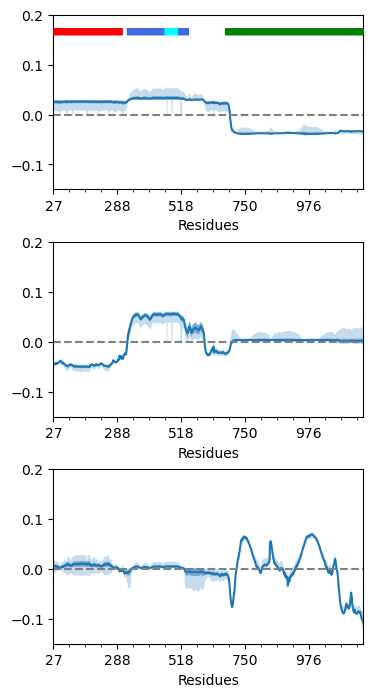

In [19]:
fig = plt.figure(figsize=(4,8.5))
g_pca = GridSpec(ncols=1, nrows=3, height_ratios=[4,4,4], width_ratios=[4.5],hspace=0.3)
subplot(g_pca[0])
showSignatureMode(gnms[:, 0]);
ax = plt.gca()
ax.set_ylim(-0.15,0.2)
title('')
# Adjust the layout to make space above the plot for the domain bar
plt.subplots_adjust(top=0.85)  # Adjust the top space for the domain bar
domain_ax = fig.add_axes([ax.get_position().x0, 0.83, ax.get_position().width, 0.0], frame_on=False)
domain_ax.set_xticks([])
domain_ax.set_yticks([])
domain_ax.set_xlim(ax.get_xlim())  # Set the same x-axis limits as the main plot
showDomainBar(dom2.getData('domain'),loc=1,color=colors, text=False, ax=domain_ax)

subplot(g_pca[1])
showSignatureMode(gnms[:, 1]);
ax = plt.gca()
ax.set_ylim(-0.15,0.2)
title('')
# Adjust the layout to make space above the plot for the domain bar
plt.subplots_adjust(top=0.85)  # Adjust the top space for the domain bar
domain_ax = fig.add_axes([ax.get_position().x0, 0.83, ax.get_position().width, 0.0], frame_on=False)
domain_ax.set_xticks([])
domain_ax.set_yticks([])
domain_ax.set_xlim(ax.get_xlim())  # Set the same x-axis limits as the main plot
showDomainBar(dom2.getData('domain'),loc=1,color=colors, text=False, ax=domain_ax)

subplot(g_pca[2])
showSignatureMode(gnms[:, 2]);
ax = plt.gca()
ax.set_ylim(-0.15,0.2)
title('')
# Adjust the layout to make space above the plot for the domain bar
plt.subplots_adjust(top=0.85)  # Adjust the top space for the domain bar
domain_ax = fig.add_axes([ax.get_position().x0, 0.83, ax.get_position().width, 0.0], frame_on=False)
domain_ax.set_xticks([])
domain_ax.set_yticks([])
domain_ax.set_xlim(ax.get_xlim())  # Set the same x-axis limits as the main plot
showDomainBar(dom2.getData('domain'),loc=1,color=colors, text=False, ax=domain_ax)


show()

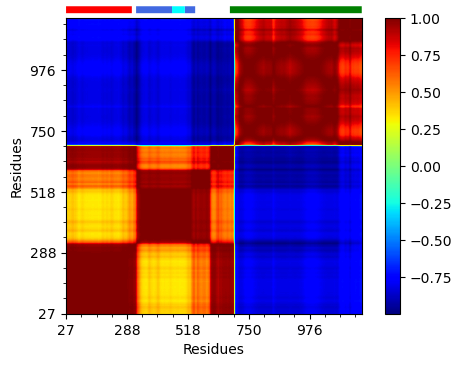

In [20]:
fig = plt.figure(figsize=(6,4))
sig_a = showSignatureCrossCorr(gnms[:, :3], interactive=False)
title('')
ax = plt.gca()
ax.set_ylim(auto=True)
# Adjust the layout to make space above the plot for the domain bar
plt.subplots_adjust(top=0.85)  # Adjust the top space for the domain bar
domain_ax = fig.add_axes([ax.get_position().x0, 0.87, ax.get_position().width, 0.0], frame_on=False)
domain_ax.set_xticks([])
domain_ax.set_yticks([])
domain_ax.set_xlim(ax.get_xlim())  # Set the same x-axis limits as the main plot
showDomainBar(dom2.getData('domain'),loc=1,color=colors, text=False, ax=domain_ax)
show()


In [21]:
labels = ensemble.getLabels()
rmsd_matrix_new = ensemble.getRMSDs(pairwise=True)
rmsd_tree_new = calcTree(names=labels, 
                     distance_matrix=rmsd_matrix_new, 
                     method='upgma')
reordered_rmsd, new_rmsd_indices = reorderMatrix(names=labels, matrix=rmsd_matrix_new, tree=rmsd_tree_new)
rmsd_reordered_ens = ensemble[new_rmsd_indices]
lab_rmsd = rmsd_reordered_ens.getLabels()
pdbid_lab_rmsd = [s.replace('_ca','') for s in lab_rmsd]
pdbid_lab_rmsd = [s.replace('_','') for s in pdbid_lab_rmsd]


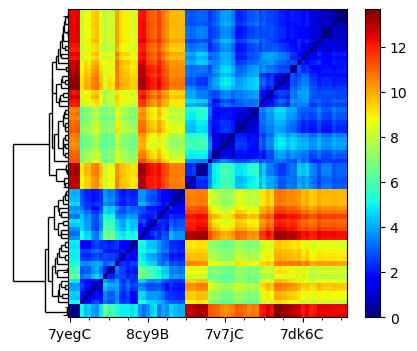

In [22]:
fig = plt.figure(figsize=(5.25,4))
showMatrix(reordered_rmsd, ticklabels=pdbid_lab_rmsd,y_array=rmsd_tree_new, interactive=False);

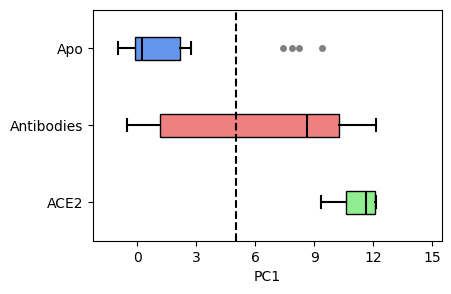

In [23]:
flierprops = dict(marker='o', markerfacecolor='gray', markersize=5,
                  markeredgecolor='none')

fig = plt.figure(figsize=(4.5,3))

# Create the boxplot with patch_artist=True so we can color boxes
bp = boxplot(data_box_pc1, vert=False, patch_artist=True, flierprops=flierprops,
             labels=['ACE2', 'Antibodies', 'Apo'])

# Define colors for each box
colors = ['lightgreen', 'lightcoral', 'cornflowerblue']

# Set facecolor for each box
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Optional: style other elements (edges, median lines, etc.)
for element in ['whiskers', 'caps', 'medians']:
    plt.setp(bp[element], color='black', linewidth=1.5)

axvline(5, linestyle='--', color='k')
title('')
xlabel('PC1')
gca().xaxis.set_major_locator(MultipleLocator(3))
xlim((-2.25, 15.5))

show()

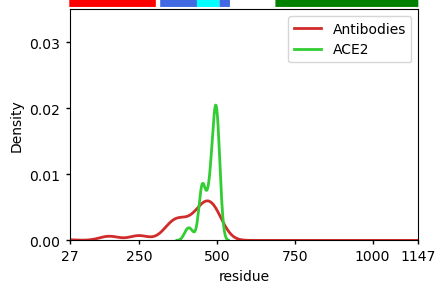

In [24]:

figure = plt.figure(figsize=(4.5,3))
g_pca = GridSpec(ncols=1, nrows=1)

plt.tick_params(direction='out', length=3, width=1, colors='k',
               grid_color='k', grid_alpha=0.5)
colors={'NTD':'red','RBD':'royalblue','RBM':'cyan','S2':'green'}

anti = sns.kdeplot(lig_total,color="#D22B2B", fill = False,thresh = 0.01,bw_adjust=1,linewidth=2)
#recep = sns.kdeplot(lista_res_receptor,color="#CF9FFF", fill = False,thresh = 0.01,bw_adjust=1,linewidth=2)
ace = sns.kdeplot(lista_res_ace2,color="limegreen", fill = False,thresh = 0.01,bw_adjust=1,linewidth=2)
ax= plt.gca()
ax.set_ylim(0,0.0359)
showDomainBar(dom.getData('domain'),loc=1,color=colors, text=False, ax=ax)
xlabel('residue')
ylabel('Density')
legend(['Antibodies', 'ACE2'], facecolor='w')

gca().yaxis.set_major_locator(MultipleLocator(0.01))
xticks(ticks=[27,250,500,750,1000,1147],label=['27','250','500','750','1000','1147'])

xlim((27,1147))
ylim((0,0.035))
show()

In [25]:
# Calculate the total number of points
total_points = len(df)

# Function to calculate weights based on group size
def get_weights(group):
    return (1.0 / total_points) * len(group)

apo_w = df[df.ligand =='apo'].ligand.tolist()
anti_w = df[df.ligand =='antibody'].ligand.tolist()
receptor_w = df[df.ligand =='receptor'].ligand.tolist()
ace2_w = df[df.ligand =='receptor(ACE2)'].ligand.tolist()

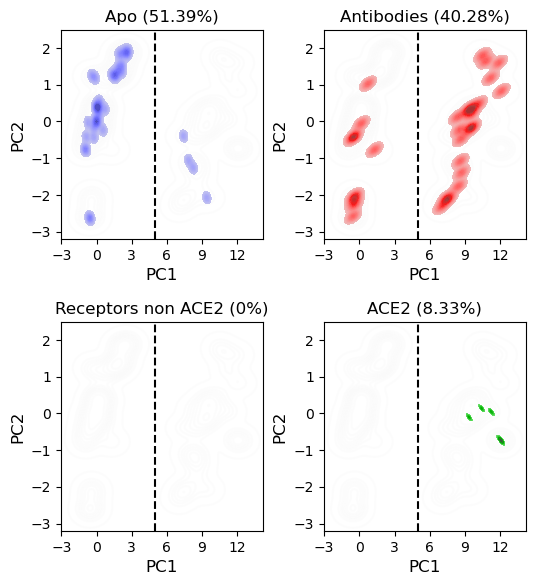

In [26]:
import seaborn as sns
fig = plt.figure(figsize=(6,6.5))
font= {'fontsize':12}
g_pca = GridSpec(ncols=2, nrows=2, height_ratios=[4,4], width_ratios=[4.5,4.5],wspace=0.3, hspace=0.4)
#based on group
thr = 0.08
bw = 0.15
lv = 30

subplot(g_pca[0])
sns.kdeplot(x=df.proj_pc1, y=df.proj_pc2,thresh = 0.01,bw_adjust=0.3,color='lightgray',alpha=0.05)
sns.kdeplot(x=df[df.ligand == 'apo'].proj_pc1, y=df[df.ligand == 'apo'].proj_pc2,
            thresh = thr,bw_adjust=bw,
            levels = lv,color='blue', shade=True,weights=get_weights(apo_w))
#sns.kdeplot(x=bla2.proj_pc1, y=bla2.proj_pc2,thresh = thr,bw_adjust=bw, cmap="Reds", shade=True)
#showProjection(ensemble_all_close[lista_sem_ligante],pca_all_close[:2], color = 'k', markersize = 2)
import matplotlib.ticker as mticker
gca().xaxis.set_major_locator(mticker.MultipleLocator(3))
xlabel('PC1',fontdict=font)
ylabel('PC2',fontdict=font)
title('Apo ('+str(df_total_percentage_ligand[0])+'%)',fontdict=font)
plt.axvline(5, color='black', linestyle='--')

subplot(g_pca[1])
sns.kdeplot(x=df.proj_pc1, y=df.proj_pc2,thresh = 0.01,bw_adjust=0.3, color='lightgray',alpha=0.05)
sns.kdeplot(x=df[df.ligand == 'antibody'].proj_pc1, y=df[df.ligand == 'antibody'].proj_pc2,
            thresh = thr,bw_adjust=bw,
            levels = lv, color='red', weights=get_weights(anti_w),
            shade=True)
#showProjection(ensemble_all_close[lista_cadeia_anti_correta],pca_all_close[:2], color = 'k',markersize = 2)
import matplotlib.ticker as mticker
gca().xaxis.set_major_locator(mticker.MultipleLocator(3))
xlabel('PC1',fontdict=font)
ylabel('PC2',fontdict=font)
title('Antibodies ('+str(df_total_percentage_ligand[1])+'%)',fontdict=font) #título
plt.axvline(5, color='black', linestyle='--')

subplot(g_pca[2])
sns.kdeplot(x=df.proj_pc1, y=df.proj_pc2,thresh = 0.01,bw_adjust=0.3, color='lightgray',alpha=0.05)
#sns.kdeplot(x=df[df.ligand == 'receptor'].proj_pc1, y=df[df.ligand == 'receptor'].proj_pc2,
#            thresh = thr,bw_adjust=bw,
#            levels = lv, color='purple', weights=get_weights(receptor_w),
#            shade=True)
#showProjection(ensemble_all_close[lista_non_ace2],pca_all_close[:2], color = 'k', markersize = 2)
import matplotlib.ticker as mticker
gca().xaxis.set_major_locator(mticker.MultipleLocator(3))
xlabel('PC1',fontdict=font)
ylabel('PC2',fontdict=font)
title('Receptors non ACE2 (0%)', fontdict=font) #título
plt.axvline(5, color='black', linestyle='--')

subplot(g_pca[3])
sns.kdeplot(x=df.proj_pc1, y=df.proj_pc2,thresh = 0.01,bw_adjust=0.3, color='lightgray',alpha=0.05)
#sns.kdeplot(x=bla4.proj_pc1, y=bla4.proj_pc2,thresh = 0.01,bw_adjust=0.5, color='purple')
sns.kdeplot(x=df[df.ligand == 'receptor(ACE2)'].proj_pc1, y=df[df.ligand == 'receptor(ACE2)'].proj_pc2,
            thresh = thr,bw_adjust=bw,
            levels = lv, color='Green',weights=get_weights(ace2_w),
            shade=True)
#showProjection(ensemble_all_close[lista_cadeia_ace2_correta],pca_all_close[:2], color = 'k', markersize = 2)
import matplotlib.ticker as mticker
gca().xaxis.set_major_locator(mticker.MultipleLocator(3))
xlabel('PC1',fontdict=font)
ylabel('PC2',fontdict=font)
title('ACE2 ('+str(df_total_percentage_ligand[2])+'%)',fontdict=font)
plt.axvline(5, color='black', linestyle='--')
show()

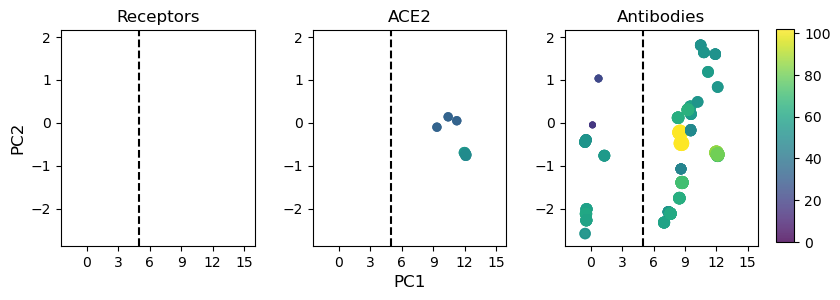

In [27]:
fig = plt.figure(figsize=(9,2.8))
g_pca = GridSpec(ncols=3, nrows=1, height_ratios=[4], width_ratios=[4.5,4.5,4.5], wspace = 0.3)

norm = plt.Normalize(min(lista_cor_total), max(lista_cor_total))


subplot(g_pca[0])
scatter(lista_pc1,lista_pc2, color = 'w')
#scatter(lista_pc1_receptor,lista_pc2_receptor, c = lista_cor_receptor, s=lista_cor_receptor, cmap = 'viridis',norm = norm, alpha = 0.8)
import matplotlib.ticker as mticker
gca().xaxis.set_major_locator(mticker.MultipleLocator(3))
ylabel('PC2',fontdict=font)
xlim((-2.5,16))
title('Receptors',fontdict=font)
plt.axvline(5, color='black', linestyle='--')


subplot(g_pca[1])
scatter(lista_pc1,lista_pc2, color = 'w')
scatter(lista_pc1_ace2,lista_pc2_ace2, c = lista_cor_ace2, s= lista_cor_ace2, cmap = 'viridis', norm = norm, alpha = 0.8)
gca().xaxis.set_major_locator(mticker.MultipleLocator(3))
xlabel('PC1',fontdict=font)
xlim((-2.5,16))
title('ACE2',fontdict=font)
plt.axvline(5, color='black', linestyle='--')


subplot(g_pca[2])
scatter(lista_pc1,lista_pc2, color = 'w')
scatter(lista_pc1_anti,lista_pc2_anti, c = lista_cor_anti, s=lista_cor_anti, cmap = 'viridis',norm = norm, alpha = 0.8)
gca().xaxis.set_major_locator(mticker.MultipleLocator(3))
xlim((-2.5,16))
title('Antibodies',fontdict=font)
plt.axvline(5, color='black', linestyle='--')

cax = axes([0.92, 0.124, 0.02, 0.76])
cbar = colorbar(cax=cax)
show()

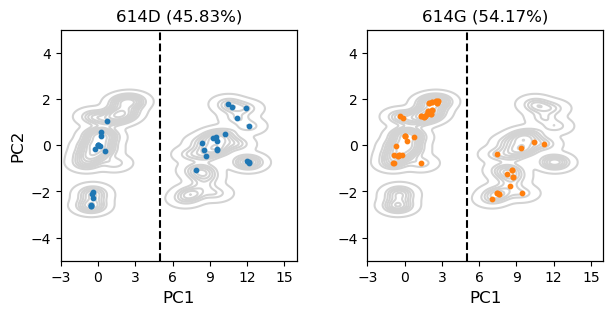

In [28]:
fig = plt.figure(figsize=(7,3))
g_pca = GridSpec(ncols=2, nrows=1, height_ratios=[4], width_ratios=[4.5,4.5], wspace = 0.3)
subplot(g_pca[0])
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(3))
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2))
ax= plt.gca()
ax.set_xlim((-3,16))
ax.set_ylim((-5,5))
ax2 = ax.twinx()
ax2.get_yaxis().set_ticks([])
ax2.set_xlim((-3,16))
ax2.set_ylim((-5,5))

sns.kdeplot(x=df.proj_pc1, y=df.proj_pc2,thresh = 0.01,bw_adjust=0.3, color='lightgray',ax=ax)
scatter(lista_pc1_d,lista_pc2_d, color = 'tab:blue', s = 10)
ax.set_xlabel('PC1',fontdict=font)
ax.set_ylabel('PC2',fontdict=font)
title('614D ('+str(df_total_percentage_res[1])+'%)',fontdict=font)
plt.axvline(5, color='black', linestyle='--')

subplot(g_pca[1])
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(3))
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2))
ax= plt.gca()
ax.set_xlim((-3,16))
ax.set_ylim((-5,5))
ax2 = ax.twinx()
ax2.get_yaxis().set_ticks([])
ax2.set_xlim((-3,16))
ax2.set_ylim((-5,5))

sns.kdeplot(x=df.proj_pc1, y=df.proj_pc2,thresh = 0.01,bw_adjust=0.3, color='lightgray',ax=ax)

scatter(lista_pc1_g,lista_pc2_g, color = 'tab:orange', s = 10)
ax.set_xlabel('',fontdict=font)
ax.set_ylabel('',fontdict=font)
title('614G ('+str(df_total_percentage_res[0])+'%)',fontdict=font) 
plt.axvline(5, color='black', linestyle='--')
ax.set_xlabel('PC1',fontdict=font)
gca().xaxis.set_major_locator(MaxNLocator(integer=True))
gca().xaxis.set_major_locator(MultipleLocator(3))

show()

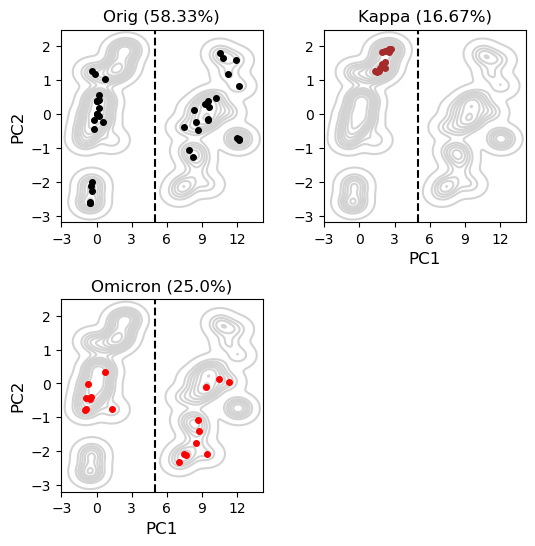

In [29]:
import seaborn as sns
fig = plt.figure(figsize=(6,6))
g_pca = GridSpec(ncols=2, nrows=2, height_ratios=[4,4], width_ratios=[4.5,4.5],wspace=0.3, hspace=0.4)

subplot(g_pca[0])
sns.kdeplot(x=df.proj_pc1, y=df.proj_pc2,thresh = 0.01,bw_adjust=0.3, color='lightgray')
showProjection(ensemble[lista_original],pca[:2], color = 'k',markersize=4)
import matplotlib.ticker as mticker
gca().xaxis.set_major_locator(mticker.MultipleLocator(3))
xlabel('',fontdict=font)
ylabel('PC2',fontdict=font)
title('Orig ('+ str(lista_percentage[0]) +'%)',fontdict=font) #título
plt.axvline(5, color='black', linestyle='--')

subplot(g_pca[1])
sns.kdeplot(x=df.proj_pc1, y=df.proj_pc2,thresh = 0.01,bw_adjust=0.3, color='lightgray')
showProjection(ensemble[lista_kappa],pca[:2], color = 'brown',markersize=4)
gca().xaxis.set_major_locator(mticker.MultipleLocator(3))
xlabel('',fontdict=font)
ylabel('',fontdict=font)
title('Kappa ('+ str(lista_percentage[1]) +'%)',fontdict=font) #título
plt.axvline(5, color='black', linestyle='--')
xlabel('PC1',fontdict=font)

subplot(g_pca[2])
sns.kdeplot(x=df.proj_pc1, y=df.proj_pc2,thresh = 0.01,bw_adjust=0.3, color='lightgray')
showProjection(ensemble[lista_omicron_ba_1],pca[:2], color = 'r',markersize=4)
showProjection(ensemble[lista_omicron_ba_2],pca[:2], color = 'r',markersize=4)
showProjection(ensemble[lista_omicron_xbb_1_5],pca[:2], color = 'r',markersize=4)
showProjection(ensemble[lista_omicron_xbb_1_0],pca[:2], color = 'r',markersize=4)
gca().xaxis.set_major_locator(mticker.MultipleLocator(3))
xlabel('PC1',fontdict=font)
ylabel('PC2',fontdict=font)
title('Omicron ('+ str(round(lista_percentage[2]+lista_percentage[4]+lista_percentage[5]+
                             lista_percentage[3],2)) +'%)',fontdict=font) #título
plt.axvline(5, color='black', linestyle='--')
show()

In [30]:
df_total.variant.value_counts()

variant
original           42
kappa              12
omicron_ba_1        6
omicron_ba_2        6
omicron_xbb_1_5     3
omicron_xbb_1_0     3
Name: count, dtype: int64

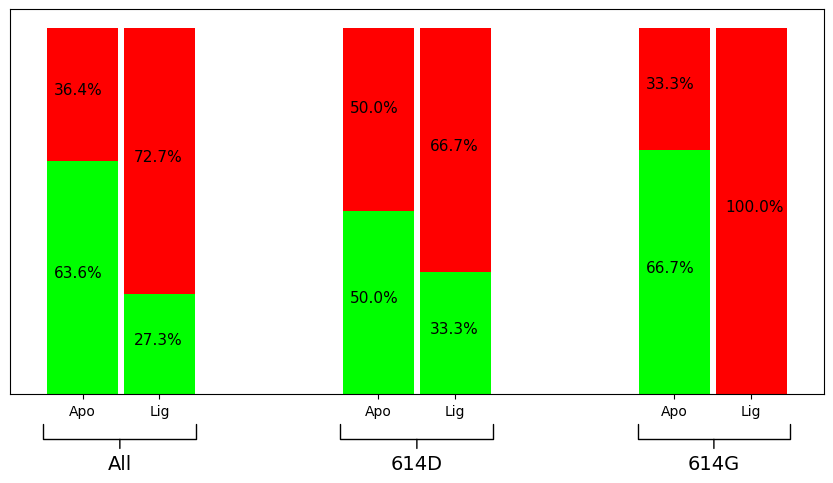

In [31]:
fig = plt.figure(figsize=(10.5,5))
g_bar = GridSpec(ncols=1, nrows=1,height_ratios=[4.4],hspace=0.3)

##primeira barra
barWidth = 0.25
space_bar = 0.02
r1 = 0.1
r2 = r1+barWidth+space_bar
r3 = r2+barWidth+space_bar

#primeira barra - 2
total_ensemble_without_lig = df_mutate_trimers[df_mutate_trimers.ligand == 'without']
total_ensemble_without_lig_correta = total_ensemble_without_lig.many_rbd_open[total_ensemble_without_lig.many_rbd_open <= 3]
bottom = 0
for i in range(len(total_ensemble_without_lig_correta.value_counts().index.to_list())):
    if (i==0):
        bar(r2,((total_ensemble_without_lig_correta.value_counts(normalize=True)[i]
                )*100),width=barWidth, bottom = bottom, color= 'lime')
        bottom += ((total_ensemble_without_lig_correta.value_counts(normalize=True)[i])*100)
    else:
        bar(r2,((total_ensemble_without_lig_correta.value_counts(normalize=True)[i])*100),width=barWidth, bottom = bottom, color= 'red')
        bottom += ((total_ensemble_without_lig_correta.value_counts(normalize=True)[i])*100)
        
#primeira barra - 3   
total_ensemble_lig = df_mutate_trimers[df_mutate_trimers.ligand != 'without']
total_ensemble_lig_correta = total_ensemble_lig.many_rbd_open[total_ensemble_lig.many_rbd_open <= 3]
bottom = 0
for i in range(len(total_ensemble_lig_correta.value_counts().index.to_list())+1):
    if (i==0):
        bar(r3,((total_ensemble_lig_correta.value_counts(normalize=True)[i])*100),width=barWidth, bottom = bottom, color= 'lime')
        bottom += ((total_ensemble_lig_correta.value_counts(normalize=True)[i])*100)
    elif (i>1):
        bar(r3,((total_ensemble_lig_correta.value_counts(normalize=True)[i])*100),width=barWidth, bottom = bottom, color= 'red')
        bottom += ((total_ensemble_lig_correta.value_counts(normalize=True)[i])*100)

        
#segunda barra
space = 0.5
r4 = r3 + space  
r5 = r4+barWidth+space_bar
r6 = r5+barWidth+space_bar
x_pos = [r4,r5,r6]
bars = ('All', 'Out', 'Lig')


#segunda barra - 2
aspara_without = total_ensemble_without_lig[total_ensemble_without_lig.resid_614 == 'ASP'].many_rbd_open[total_ensemble_without_lig.many_rbd_open <= 3]

bottom = 0
for i in range(len(aspara_without.value_counts().index.to_list())):
    if (i==0):
        bar(r5,((aspara_without.value_counts(normalize=True)[i])*100),width=barWidth, bottom = bottom, color= 'lime')
        bottom += ((aspara_without.value_counts(normalize=True)[i])*100)
    else:
        bar(r5,((aspara_without.value_counts(normalize=True)[i])*100),width=barWidth, bottom = bottom, color= 'red')
        bottom += ((aspara_without.value_counts(normalize=True)[i])*100)

#segunda barra - 3
aspara_lig = total_ensemble_lig[total_ensemble_lig.resid_614 == 'ASP'].many_rbd_open[total_ensemble_lig.many_rbd_open <= 3]

bottom = 0
for i in range(len(aspara_lig.value_counts().index.to_list())+1):
    if (i==0):
        bar(r6,((aspara_lig.value_counts(normalize=True)[i])*100),width=barWidth, bottom = bottom, color= 'lime')
        bottom += ((aspara_lig.value_counts(normalize=True)[i])*100)
    elif(i>1):
        bar(r6,((aspara_lig.value_counts(normalize=True)[i])*100),width=barWidth, bottom = bottom, color= 'red')
        bottom += ((aspara_lig.value_counts(normalize=True)[i])*100)


#terceira barra
r7 = r6 + space  
r8 = r7+barWidth +space_bar
r9 = r8+barWidth +space_bar
x_pos = [r7,r8,r9]
bars = ('All', 'Out', 'Lig')


#terceira barra - 2
glycin_without = total_ensemble_without_lig[total_ensemble_without_lig.resid_614 == 'GLY'].many_rbd_open[total_ensemble_without_lig.many_rbd_open <= 3]
#glycin_without_many = glycin_without.many_rbd_open[glycin_without.many_rbd_open <= 3]
bottom = 0
for i in range(len(glycin_without.value_counts().index.to_list())):
    if (i==0):
        bar(r8,((glycin_without.value_counts(normalize=True)[i])*100),width=barWidth, bottom = bottom, color= 'lime')
        bottom += ((glycin_without.value_counts(normalize=True)[i])*100)
    else:
        bar(r8,((glycin_without.value_counts(normalize=True)[i])*100),width=barWidth, bottom = bottom, color= 'red')
        bottom += ((glycin_without.value_counts(normalize=True)[i])*100)

#terceira barra - 3
glycin_lig = total_ensemble_lig[total_ensemble_lig.resid_614 == 'GLY'].many_rbd_open[total_ensemble_lig.many_rbd_open <= 3]

bottom = 0
for i in glycin_lig.value_counts().sort_index().index.to_list():
    if (i==0):
        bar(r9,((glycin_lig.value_counts(normalize=True)[i])*100),width=barWidth, bottom = bottom, color= 'lime')
        bottom += ((glycin_lig.value_counts(normalize=True)[i])*100)
    elif(i>1):
        bar(r9,((glycin_lig.value_counts(normalize=True)[i])*100),width=barWidth, bottom = bottom, color= 'red')
        bottom += ((glycin_lig.value_counts(normalize=True)[i])*100)
    

#texto nas barras
font = 11
valor_others = 0
n = -0.01
space_text = 1.04 #espaço entre textos de uma outra categoria
c = 0.28 # espaço entre textos de uma mesma categoria


cum = []
val = []
for valor_cum, valor in (zip(total_ensemble_without_lig_correta.value_counts(normalize=True).cumsum(),total_ensemble_without_lig_correta.value_counts(normalize=True))):
    cum.append(valor_cum)
    val.append(valor)
text(x=(n+c), y= ((cum[0]*100)-(val[0]*100/2)), s= f'{around(val[0]*100,1)}%', color="black",fontsize=font)
text(x=(n+c), y= ((cum[-1]*100)-(sum(val[1:])*100/2)), s= f'{around(sum(val[1:])*100,1)}%', color="black",fontsize=font)

cum = []
val = []
for valor_cum, valor in (zip(total_ensemble_lig_correta.value_counts(normalize=True).sort_index().cumsum(),total_ensemble_lig_correta.value_counts(normalize=True).sort_index())):
    cum.append(valor_cum)
    val.append(valor)
text(x=(n+(c*2)), y= ((cum[0]*100)-(val[0]*100/2)), s= f'{around(val[0]*100,1)}%', color="black",fontsize=font)
text(x=(n+(c*2)), y= ((cum[-1]*100)-(sum(val[1:])*100/2)), s= f'{around(sum(val[1:])*100,1)}%', color="black",fontsize=font)
cum = []
val = []
for valor_cum, valor in (zip(aspara_without.value_counts(normalize=True).cumsum(),aspara_without.value_counts(normalize=True))):
    cum.append(valor_cum)
    val.append(valor)
    
text(x=space_text+(n+c), y= ((cum[0]*100)-(val[0]*100/2)), s= f'{around(val[0]*100,1)}%', color="black",fontsize=font)
text(x=space_text+(n+c), y= ((cum[-1]*100)-(sum(val[1:])*100/2)+1.9), s= f'{around(sum(val[1:])*100,1)}%', color="black",fontsize=font)

cum = []
val = []
for valor_cum, valor in (zip(aspara_lig.value_counts(normalize=True).sort_index().cumsum(),aspara_lig.value_counts(normalize=True).sort_index())):
    cum.append(valor_cum)
    val.append(valor)
    
text(x=space_text+(n+(c*2)), y= ((cum[0]*100)-(val[0]*100/2)), s= f'{around(val[0]*100,1)}%', color="black",fontsize=font)    
text(x=space_text+(n+(c*2)), y= ((cum[-1]*100)-(sum(val[1:])*100/2)), s= f'{around(sum(val[1:])*100,1)}%', color="black",fontsize=font)        

##terceira barra
cum = []
val = []
for valor_cum, valor in (zip(glycin_without.value_counts(normalize=True).sort_index().cumsum(),glycin_without.value_counts(normalize=True).sort_index())):
    cum.append(valor_cum)
    val.append(valor)
    
text(x=(space_text*2)+(n+c), y= ((cum[0]*100)-(val[0]*100/2)), s= f'{around(val[0]*100,1)}%', color="black",fontsize=font)
text(x=(space_text*2)+(n+c), y= ((cum[-1]*100)-(sum(val[1:])*100/2)), s= f'{around(sum(val[1:])*100,1)}%', color="black",fontsize=font)

cum = []
val = []
for valor_cum, valor in (zip(glycin_lig.value_counts(normalize=True).sort_index().cumsum(),glycin_lig.value_counts(normalize=True).sort_index())):
    cum.append(valor_cum)
    val.append(valor)
    
text(x=(space_text*2)+(n+(c*2)), y= ((cum[0]*100)-(sum(val[:])*100/2))+50, s= f'{around(sum(val[:])*100,1)}%', color="black",fontsize=font)
#text(x=(space_text*2)+(n+(c*2)), y= ((cum[-1]*100)-(sum(val[1:])*100/2)), s= f'{around(sum(val[1:])*100,1)}%', color="black",fontsize=font)
    
    
# Create names on the x-axis
x_pos = [r2,r3,r5,r6,r8,r9]
bars = ('Apo', 'Lig','Apo','Lig','Apo','Lig')  
plt.xticks(x_pos, bars)
plt.yticks([])

##anotação
p = 0.135 #posição
s = 0.365 #espaço

annotate('All',fontsize=14, xy=(p, -0.11), xycoords='axes fraction', xytext=(p, -0.18),ha='center', va='center', 
            arrowprops=dict(arrowstyle="-[", color='k',mutation_scale=55))
annotate('614D',fontsize=14, xy=(p+s, -0.11), xycoords='axes fraction', xytext=(p+s, -0.18),ha='center', va='center', 
            arrowprops=dict(arrowstyle="-[", color='k',mutation_scale=55))
annotate('614G',fontsize=14, xy=(p+(2*s), -0.11), xycoords='axes fraction', xytext=(p+(2*s), -0.18),ha='center', va='center', 
            arrowprops=dict(arrowstyle="-[", color='k',mutation_scale=55))
show()


In [32]:
df_cvs_apo = df_mutate_trimers[(df_mutate_trimers.ligand == 'without')]
df_cvs_lig = df_mutate_trimers[(df_mutate_trimers.ligand != 'without')]

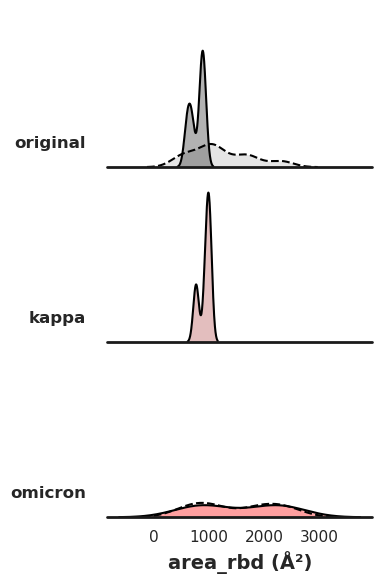

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Adiciona coluna de status
df_cvs_apo['Ligand_status'] = 'apo'
df_cvs_lig['Ligand_status'] = 'ligand'

# Junta os dois dataframes
df_cvs_combined = pd.concat([df_cvs_apo, df_cvs_lig], ignore_index=True)

# Agrupando variantes ômicron
df_cvs_combined['Variant_grouped'] = df_cvs_combined['Variant'].apply(lambda x: 'omicron' if x.startswith('omicron') else x)

# Ordenação categórica
variant_order = ['original', 'kappa', 'omicron']
df_cvs_combined['Variant_grouped'] = pd.Categorical(df_cvs_combined['Variant_grouped'], categories=variant_order, ordered=True)

# Cores das variantes
variant_colors = {
    'original': 'black',
    'kappa': 'brown',
    'omicron': 'red'
}

# Estilo
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# FacetGrid
g = sns.FacetGrid(
    df_cvs_combined,
    row="Variant_grouped",
    aspect=2,
    height=2,
    sharex=True
)

# KDE preenchido com alpha ajustado por status de ligante
def ridge_fill_ligand(data, **kwargs):
    variant = data['Variant_grouped'].iloc[0]
    fill_color = variant_colors.get(variant, 'gray')

    # Apo (sem ligante)
    data_apo = data[data['Ligand_status'] == 'apo']
    if not data_apo.empty:
        sns.kdeplot(data=data_apo, x="area_rbd", fill=True, color=fill_color, alpha=0.3, linewidth=0, bw_adjust=0.6)

    # Ligado (com ligante)
    data_lig = data[data['Ligand_status'] == 'ligand']
    if not data_lig.empty:
        sns.kdeplot(data=data_lig, x="area_rbd", fill=True, color=fill_color, alpha=0.1, linewidth=0, bw_adjust=0.6)

# Contorno preto (somente para apo, opcionalmente para lig)
def ridge_line(data, **kwargs):
    # Contorno para apo:
    data_apo = data[data['Ligand_status'] == 'apo']
    if not data_apo.empty:
        sns.kdeplot(data=data_apo, x="area_rbd", fill=False, color='black', linewidth=1.5, bw_adjust=0.6)

 # Contorno para ligante
    data_lig = data[data['Ligand_status'] == 'ligand']
    if not data_lig.empty:
        sns.kdeplot(data=data_lig, x="area_rbd", fill=False, color='black', linewidth=1.5, bw_adjust=0.6, linestyle='--')
    
# Mapear funções
g.map_dataframe(ridge_fill_ligand)
g.map_dataframe(ridge_line)

# Linha de base
g.map(plt.axhline, y=0, lw=2, clip_on=False, color='k')
g.fig.subplots_adjust(hspace=-0.7)
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Rótulos da variante
for ax, label in zip(g.axes.flat, variant_order):
    ax.text(-0.08, 0.15, label, fontsize=12, ha='right', va='center', transform=ax.transAxes, weight='bold')

# Eixo X
plt.xlabel('area_rbd (Å²)', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

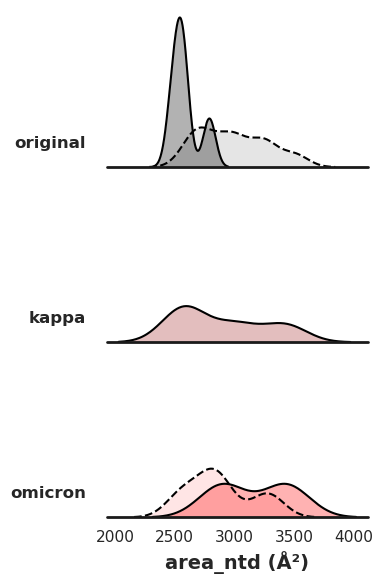

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Adiciona coluna de status
df_cvs_apo['Ligand_status'] = 'apo'
df_cvs_lig['Ligand_status'] = 'ligand'

# Junta os dois dataframes
df_cvs_combined = pd.concat([df_cvs_apo, df_cvs_lig], ignore_index=True)

# Agrupando variantes ômicron
df_cvs_combined['Variant_grouped'] = df_cvs_combined['Variant'].apply(lambda x: 'omicron' if x.startswith('omicron') else x)

# Ordenação categórica
variant_order = ['original', 'kappa', 'omicron']
df_cvs_combined['Variant_grouped'] = pd.Categorical(df_cvs_combined['Variant_grouped'], categories=variant_order, ordered=True)

# Cores das variantes
variant_colors = {
    'original': 'black',
    'kappa': 'brown',
    'omicron': 'red'
}

# Estilo
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# FacetGrid
g = sns.FacetGrid(
    df_cvs_combined,
    row="Variant_grouped",
    aspect=2,
    height=2,
    sharex=True
)

# KDE preenchido com alpha ajustado por status de ligante
def ridge_fill_ligand(data, **kwargs):
    variant = data['Variant_grouped'].iloc[0]
    fill_color = variant_colors.get(variant, 'gray')

    # Apo (sem ligante)
    data_apo = data[data['Ligand_status'] == 'apo']
    if not data_apo.empty:
        sns.kdeplot(data=data_apo, x="area_ntd", fill=True, color=fill_color, alpha=0.3, linewidth=0, bw_adjust=0.6)

    # Ligado (com ligante)
    data_lig = data[data['Ligand_status'] == 'ligand']
    if not data_lig.empty:
        sns.kdeplot(data=data_lig, x="area_ntd", fill=True, color=fill_color, alpha=0.1, linewidth=0, bw_adjust=0.6)

# Contorno preto (somente para apo, opcionalmente para lig)
def ridge_line(data, **kwargs):
    # Contorno para apo:
    data_apo = data[data['Ligand_status'] == 'apo']
    if not data_apo.empty:
        sns.kdeplot(data=data_apo, x="area_ntd", fill=False, color='black', linewidth=1.5, bw_adjust=0.6)

 # Contorno para ligante
    data_lig = data[data['Ligand_status'] == 'ligand']
    if not data_lig.empty:
        sns.kdeplot(data=data_lig, x="area_ntd", fill=False, color='black', linewidth=1.5, bw_adjust=0.6, linestyle='--')
    
# Mapear funções
g.map_dataframe(ridge_fill_ligand)
g.map_dataframe(ridge_line)

# Linha de base
g.map(plt.axhline, y=0, lw=2, clip_on=False, color='k')
g.fig.subplots_adjust(hspace=-0.7)
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Rótulos da variante
for ax, label in zip(g.axes.flat, variant_order):
    ax.text(-0.08, 0.15, label, fontsize=12, ha='right', va='center', transform=ax.transAxes, weight='bold')

# Eixo X
plt.xlabel('area_ntd (Å²)', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

#### This script will create the necessary files to perform the dynamical network analysis with Bio3d inside R

In [35]:
#write files for R analyses
#pdbids
pdbids_file = [s[:4] + '_' + s[4] for s in df_total.pdb.tolist()]

f = open("pdbids.txt", "w")
for i in pdbids_file:
    f.write(i+ '\n')
f.close()
#table
df_total.to_csv('df_total.csv', sep=',')
#pdbs
from os import mkdir #importar comando para criação de diretório
from os.path import isdir #importar comando para verificação de diretório
from os import chdir 

if not isdir('./structures/pdbs_r'): #se diretório não existir
    mkdir('./structures/pdbs_r') #criar diretório


for id, pdb in enumerate(pdbids_file):
    writePDB('./structures/pdbs_r/'+pdb,ensemble.getConformation(id))